## Task 1. K - anonymity analysis

* a)
Randomly generate a dataset (dataframe) with eight columns and 50,000 rows. Each
column should be a categorical variable (of arbitrary name) with three levels (of arbi-
trary names) in approximately equal proportions.

    
    
* b)
Verify that the proportions of each value are similar for each of the eight columns.

    

* c)
How many unique rows (i.e., permutations of category levels) are possible?

    

* d)
Write some code to produce a table and graph which show the frequencies (numbers
of groups) by permutation group sizes (up to group size of 10). That is, how many
groups are unique combinations (group size = 1), how many groups are made up of a
pair of matching combinations (group size = 2), how many groups are made up three
the same, etc?

   


* e)
Comment upon the distribution of group sizes in d).


    


* f)
If your random variables were, in fact, meaningful information on individuals, which
group sizes are of most concern from a privacy perspective? 

    

* g)
Consider the effect of missing data in the dataset you created in Part a). How might
this complicate the production of a frequency table of group sizes in Part d)?

    
* h)
Imagine the code that you wrote for Part d) was to be deployed in an automated system
that Mirador's customers could use independently, on potentially large volumes of data.
Describe how you might deploy the code, and what additional considerations you might
have or any changes to the code you might make. Note: it is not necessary to provide
another version of the code used for 1 d).

**a) I am using [numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) to generate an array of size(50000,8) and of equal probability distributions of a,b,c and then create a dataframe.**

In [1]:
import pandas as pd
import numpy as np

# setting a random seed to make my results reproducible
np.random.seed(27) 

In [2]:
# creating the dataset
list_cat = ['a', 'b', 'c']
arr = np.random.choice(list_cat, size =(50000,8), p=[1/3, 1/3, 1/3])
arr

cols = ['num1','num2','num3','num4','num5','num6','num7','num8']
df = pd.DataFrame(arr, columns = cols)
df

,num1,num2,num3,num4,num5,num6,num7,num8
0,b,c,c,c,b,c,c,a
1,c,b,c,c,c,c,a,a
2,b,c,a,a,a,a,c,a
3,a,c,a,b,b,b,a,c
4,c,c,c,b,b,b,a,a
...,...,...,...,...,...,...,...,...
49995,c,a,c,c,b,a,b,c
49996,a,c,b,b,a,b,c,b
49997,b,c,a,b,b,a,a,b
49998,a,b,c,b,c,c,b,a


In [3]:
for col in cols:
    df[col] = df[col].astype('category',copy=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   num1    50000 non-null  category
 1   num2    50000 non-null  category
 2   num3    50000 non-null  category
 3   num4    50000 non-null  category
 4   num5    50000 non-null  category
 5   num6    50000 non-null  category
 6   num7    50000 non-null  category
 7   num8    50000 non-null  category
dtypes: category(8)
memory usage: 391.6 KB


**b) the proportions of each value, a, b or c, are about the same in each column.**

In [4]:
pd.concat([df[col].value_counts() for col in df], axis = 1)

,num1,num2,num3,num4,num5,num6,num7,num8
a,16784,16749,16784,16832,16620,16271,16563,16748
b,16611,16507,16480,16723,16604,16938,16755,16582
c,16605,16744,16736,16445,16776,16791,16682,16670


**c) There are 6559 unique rows**   

In [172]:
df_unique = df.drop_duplicates()
len(df_unique)

6559

**d) The following code and plot show the frequency of groups by group size.**

In [5]:
# joining each row values as strings
df['combined'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
df.sort_values('combined', inplace = True)
df.head()

,num1,num2,num3,num4,num5,num6,num7,num8,combined
14894,a,a,a,a,a,a,a,a,a_a_a_a_a_a_a_a
30710,a,a,a,a,a,a,a,a,a_a_a_a_a_a_a_a
44243,a,a,a,a,a,a,a,a,a_a_a_a_a_a_a_a
28097,a,a,a,a,a,a,a,a,a_a_a_a_a_a_a_a
31904,a,a,a,a,a,a,a,a,a_a_a_a_a_a_a_a


In [6]:
# grouping by the same string values
s_count = df.groupby(['combined']).count().iloc[:, 0]
df_count = s_count.to_frame().reset_index()
df_count.rename(columns={'num1':'Group_Size'},inplace=True)
df_count.head(8)

,combined,Group_Size
0,a_a_a_a_a_a_a_a,5
1,a_a_a_a_a_a_a_b,6
2,a_a_a_a_a_a_a_c,6
3,a_a_a_a_a_a_b_a,10
4,a_a_a_a_a_a_b_b,8
5,a_a_a_a_a_a_b_c,5
6,a_a_a_a_a_a_c_a,11
7,a_a_a_a_a_a_c_b,3


In [7]:
#  A Table with the frequencies up to group size of 10
df_count = df_count.sort_values(by='Group_Size').copy()
df_count_10 = df_count.loc[df_count['Group_Size'] < 11]
df_count_10.tail(10)

,combined,Group_Size
1038,a_b_b_a_c_b_b_a,10
5284,c_b_a_c_a_c_b_a,10
2735,b_a_c_a_c_a_c_c,10
3415,b_b_c_a_a_b_b_b,10
616,a_a_c_b_b_c_b_b,10
2721,b_a_c_a_b_c_b_a,10
3414,b_b_c_a_a_b_b_a,10
1499,a_c_a_a_b_b_b_c,10
107,a_a_a_b_a_c_c_c,10
1041,a_b_b_a_c_b_c_a,10


In [8]:
group_count_s = df_count_10.groupby(['Group_Size'])['Group_Size'].count()
df_group_count = group_count_s.to_frame()
df_group_count = df_group_count.rename(columns={df_group_count.columns[0]:'No of Groups'})

df_group_count

,No of Groups
Group_Size,
1,23
2,115
3,252
4,445
5,693
6,861
7,922
8,891
9,769


In [199]:
# which group size is 'a_a_a_a_a_a_a_a'?
df_count_aaa= df_count_10.loc[df_count_10['combined'] == 'a_a_a_a_a_a_a_a'] #5  #4#6  
df_count_aaa

,combined,Group_Size
0,a_a_a_a_a_a_a_a,5


In [201]:
df_count_1= df_count_10.loc[df_count_10['Group_Size'] == 1]   
df_count_1.head(3)

,combined,Group_Size
2360,b_a_a_c_a_b_a_c,1
6086,c_c_b_a_a_b_b_b,1
5948,c_c_a_b_b_b_a_b,1


Text(0, 0.5, 'Number of groups')

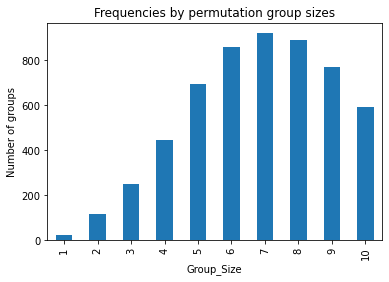

In [9]:
# visualising the number of groups

import matplotlib.pyplot as plt

myplot = df_group_count.plot( kind='bar',legend=False,title="Frequencies by permutation group sizes")
myplot.set_ylabel("Number of groups")

**e) 6,7 and 8 seem to be the most common group sizes while the group size of 1 is the least popular one(there are only 23 groups of size 1). This is a left-skewed distribution.**

   **Our unique entries such as 'a_a_a_a_a_a_a_a', 'b_b_b_b_b_b_b_b' and 'c_c_c_c_c_c_c_c' are in the group sizes of 5, 4 and 6, respectively.**

**f) The group sizes of 4,5,6 would be of most concern from the privacy prospective because something like 'a_a_a_a_a_a_a_a' would make it very easy to id a person.**

**g) Missing data(nans) will increase the number of group sizes (i.e. permutations) if the nans are left in the table.**

In [181]:
# introducing some missing values
df.iloc[5,6] = np.nan
df.iloc[3:33,4] = np.nan
df.head(10)

,num1,num2,num3,num4,num5,num6,num7,num8,combined
14894,a,a,a,a,a,a,a,a,a_a_a_a_a_a_a_a
30710,a,a,a,a,a,a,a,a,a_a_a_a_a_a_a_a
44243,a,a,a,a,a,a,a,a,a_a_a_a_a_a_a_a
28097,a,a,a,a,NaN,a,a,a,a_a_a_a_a_a_a_a
31904,a,a,a,a,NaN,a,a,a,a_a_a_a_a_a_a_a
14180,a,a,a,a,NaN,a,NaN,b,a_a_a_a_a_a_a_b
43172,a,a,a,a,NaN,a,a,b,a_a_a_a_a_a_a_b
11765,a,a,a,a,NaN,a,a,b,a_a_a_a_a_a_a_b
17768,a,a,a,a,NaN,a,a,b,a_a_a_a_a_a_a_b
5076,a,a,a,a,NaN,a,a,b,a_a_a_a_a_a_a_b


In [184]:
# joining each row values as strings
df['combined'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
df.head(10)

,num1,num2,num3,num4,num5,num6,num7,num8,combined
14894,a,a,a,a,a,a,a,a,a_a_a_a_a_a_a_a
30710,a,a,a,a,a,a,a,a,a_a_a_a_a_a_a_a
44243,a,a,a,a,a,a,a,a,a_a_a_a_a_a_a_a
28097,a,a,a,a,NaN,a,a,a,a_a_a_a_nan_a_a_a
31904,a,a,a,a,NaN,a,a,a,a_a_a_a_nan_a_a_a
14180,a,a,a,a,NaN,a,NaN,b,a_a_a_a_nan_a_nan_b
43172,a,a,a,a,NaN,a,a,b,a_a_a_a_nan_a_a_b
11765,a,a,a,a,NaN,a,a,b,a_a_a_a_nan_a_a_b
17768,a,a,a,a,NaN,a,a,b,a_a_a_a_nan_a_a_b
5076,a,a,a,a,NaN,a,a,b,a_a_a_a_nan_a_a_b


In [189]:
# grouping by the same string values
s_count = df.groupby(['combined']).count().iloc[:, 0]
df_count = s_count.to_frame().reset_index()
df_count.rename(columns={'num1':'Group_Size'},inplace=True)
df_count = df_count.sort_values(by='Group_Size').copy()
df_count_10 = df_count.loc[df_count['Group_Size'] < 11]
df_count_10.head()


,combined,Group_Size
83,a_a_a_a_nan_a_nan_b,1
3819,b_c_a_c_a_b_a_b,1
2777,b_a_c_b_a_c_a_c,1
5951,c_c_a_b_b_b_a_b,1
2386,b_a_a_c_b_a_c_b,1


In [190]:
# counting groups of the same size.. size from 1 to 19.
group_count_s = df_count_10.groupby(['Group_Size'])['Group_Size'].count()
df_group_count = group_count_s.to_frame()
df_group_count = df_group_count.rename(columns={df_group_count.columns[0]:'No of Groups'})
df_group_count

,No of Groups
Group_Size,
1,24
2,117
3,253
4,445
5,693
6,861
7,922
8,890
9,769


**h) If my code went live and was deployed using AWS I would need to make sure that the code could be run in parallel and be performant for many customers. I could do this by importing the multiprocessing library in python, for example. I might want to capture the execusion times of my code as well. In AWS, some data could be encrypted and or set to be accessible by region(data locality) to address data privacy concerns.**

## Task 2. Postcodes and Privacy

Data handling in the UK post Brexit is regulared by the UK GDPR. Postal addresses fall under the scope o Personally Identifiable Information (PII) if an address is unique or can be combined with other personal information such as name,age, car to uniquely identify an individual.
 
 [Guide to UK GDPR](https://ico.org.uk/for-organisations/guide-to-data-protection/guide-to-the-general-data-protection-regulation-gdpr/)  
 
This dataset consists of  1'308'780 entries of UK postcodes from the 2011 Census. These are tabular data on the total number of Occupied households, the number of total occupants and the number of males and females living in a postcode. They can be generally referred to as 'residents'.
With my code below, I investigate the data on postal codes and the related householdes and occupants gender to  see if small groups and individuals can be identified by their postcode alone. I will focus my analysis on the following objectives: 


**1-)** Using the first part of a postal code (which normally consists of two letters and 1-2 digits e.g. EH22 or AL1), can we still identify some individuals and small groups?  The small groups are defined as less than 100 of occupied households in a postcode.

**2-)** Which postcodes can be problematic giving away personal data and which postcode(s) are the absolute worst allowing to directly identify individuals?

**3-)** Can we adopt the US approach to handling postal code data. More specifically,  can we lump together some 3-digit codes that have fewer than 20,000 residents, under a new code (000) to ensure data privacy?


As a first step I have discovered the presence of the households and individuals that could be uniquely identified by their postcode (MK43 9NU is one example of these). In fact, 98'053 or **7.49% of all entries** belong to uniquely identifiable residents.

Then I grouped the residents by the first part of their postcode. If a postcode has over 20'000 residents - for example,  the postcodes beginning with CR0 have 61'886 households including 79'108 emale and 74'704 male residents - we can say that this data is well aggregated ruling out data privacy concerns.
By contrast, we can still undentify some small groups within our data. There are 16 postcodes where the total number of households are under 100, including 6 of them with 7 households or fewer in each group. Below are the 'problematic' postal codes:

**'TR24', 'M2', 'TR25', 'TD9', 'PE35', 'TR23', 'TR22', 'CR9', 'DG16', 'M60', 'TW6', 'M17', 'TD5', 'DG14', 'B40', 'UB11'**. 

In some instances, like with the **UB11 1AA** postcode, it is clear that the two individuals living at this address are directly identifiable. 

In an answer of whether we could adopt the US approach to the UK I would say we could with a choice of a suitable benchmark for pooling  the residents of the 'problematic' postcodes under the (000) code. In this example,I would certainly aggregate the postcode entries for the uniquely identifiable households, males and females.

### Code

In [18]:
url= 'http://www.nomisweb.co.uk/output/census/2011/Postcode_Estimates_Table_1.csv'
dfp = pd.read_csv(url)
dfp.head(10)

,Postcode,Total,Males,Females,Occupied_Households
0,AL1 1AG,14,6,8,6
1,AL1 1AJ,124,60,64,51
2,AL1 1AR,32,17,15,17
3,AL1 1AS,34,17,17,13
4,AL1 1BH,52,15,37,41
5,AL1 1BX,54,26,28,19
6,AL1 1BY,18,9,9,5
7,AL1 1BZ,18,11,7,12
8,AL1 1DG,24,10,14,8
9,AL1 1DH,33,18,15,18


In [148]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308780 entries, 0 to 1308779
Data columns (total 5 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   Postcode             1308780 non-null  object
 1   Total                1308780 non-null  int64 
 2   Males                1308780 non-null  int64 
 3   Females              1308780 non-null  int64 
 4   Occupied_Households  1308780 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 49.9+ MB


In [19]:
# See if any households are uniquely identifiable by postcode - there are 59777 of these.
dfp['Postcode'] = dfp['Postcode'].str.strip()  #removing possible white spaces in the Postcode column
dfp_sorted = dfp.loc[(dfp.Occupied_Households <2) & (dfp.Occupied_Households >0)]
dfp_sorted.sort_values('Occupied_Households')

,Postcode,Total,Males,Females,Occupied_Households
17,AL1 1EB,4,1,3,1
884832,PR3 1BJ,2,1,1,1
884843,PR3 1DD,5,4,1,1
884936,PR3 1LN,4,2,2,1
884961,PR3 1NU,1,1,0,1
...,...,...,...,...,...
454772,HG4 3RF,3,1,2,1
454773,HG4 3RG,3,2,1,1
454775,HG4 3RJ,5,3,2,1
454727,HG4 3NN,1,0,1,1


In [150]:
# percentage of Households to total entries.
round(59777/1308780*100,2)

4.57

In [20]:
# where  there is only one household, male or female per unique postal code
dfp_sorted_1 = dfp.loc[(dfp.Occupied_Households <2) | (dfp.Females <2)  | (dfp.Males <2) ]
dfp_sorted_1

,Postcode,Total,Males,Females,Occupied_Households
17,AL1 1EB,4,1,3,1
19,AL1 1ER,2,2,0,1
21,AL1 1EZ,1,1,0,0
23,AL1 1HB,3,1,2,2
25,AL1 1HH,4,3,1,2
...,...,...,...,...,...
1308656,YO8 9LP,3,1,2,1
1308687,YO8 9PB,2,1,1,1
1308705,YO8 9PZ,1,0,1,1
1308744,YO8 9SD,1,0,1,1


In [152]:
# percentage of all entries
round(98053/1308780*100,2)

7.49

In [21]:
# removing the last 3 characters from the postcodes assuming that all postcodes end with 1 digit and 2 letters
dfp['Postcode1'] = dfp['Postcode'].apply(lambda x: x[:-3].strip())
dfp

,Postcode,Total,Males,Females,Occupied_Households,Postcode1
0,AL1 1AG,14,6,8,6,AL1
1,AL1 1AJ,124,60,64,51,AL1
2,AL1 1AR,32,17,15,17,AL1
3,AL1 1AS,34,17,17,13,AL1
4,AL1 1BH,52,15,37,41,AL1
...,...,...,...,...,...,...
1308775,YO8 9YA,23,14,9,8,YO8
1308776,YO8 9YB,33,17,16,13,YO8
1308777,YO8 9YD,9,4,5,4,YO8
1308778,YO8 9YE,13,6,7,3,YO8


In [22]:
# removing possible white spaces
dfp['Postcode1'] = dfp['Postcode1'].str.strip()
dfp.tail(10)

,Postcode,Total,Males,Females,Occupied_Households,Postcode1
1308770,YO8 9XH,55,29,26,17,YO8
1308771,YO8 9XJ,32,14,18,15,YO8
1308772,YO8 9XL,27,13,14,12,YO8
1308773,YO8 9XN,56,28,28,18,YO8
1308774,YO8 9XP,51,29,22,23,YO8
1308775,YO8 9YA,23,14,9,8,YO8
1308776,YO8 9YB,33,17,16,13,YO8
1308777,YO8 9YD,9,4,5,4,YO8
1308778,YO8 9YE,13,6,7,3,YO8
1308779,YO8 9YF,11,4,7,8,YO8


In [15]:
# removing the letters from the end of the string like EC2N
dfp['Postcode1'] = dfp['Postcode1'].str.replace(r'[A-Za-z]$', '')
dfp

,Postcode,Total,Males,Females,Occupied_Households,Postcode1
0,AL1 1AG,14,6,8,6,AL1
1,AL1 1AJ,124,60,64,51,AL1
2,AL1 1AR,32,17,15,17,AL1
3,AL1 1AS,34,17,17,13,AL1
4,AL1 1BH,52,15,37,41,AL1
...,...,...,...,...,...,...
1308775,YO8 9YA,23,14,9,8,YO8
1308776,YO8 9YB,33,17,16,13,YO8
1308777,YO8 9YD,9,4,5,4,YO8
1308778,YO8 9YE,13,6,7,3,YO8


In [159]:
# summing up postcodes and sorting by Occupied_Households
dfp1= dfp.groupby(['Postcode1']).sum().reset_index().sort_values('Occupied_Households', ascending=False)
dfp1

,Postcode1,Total,Males,Females,Occupied_Households
398,CR0,153812,74704,79108,61886
963,LE2,119003,58508,60495,44054
1178,N1,90971,44810,46161,41539
964,LE3,101091,49922,51169,41235
189,BN2,93174,46526,46648,40795
...,...,...,...,...,...
1096,M17,17,8,9,7
1947,TD5,10,6,4,5
505,DG14,7,4,3,4
42,B40,9,6,3,2


In [160]:
# Select fewer than 20'000 households

dfp_less_than_20K = dfp1.loc[dfp1.Occupied_Households <20000]
dfp_less_than_20K

,Postcode1,Total,Males,Females,Occupied_Households
2126,WA3,47610,23936,23674,19989
282,CB1,48585,24354,24231,19951
813,IG1,63585,32370,31215,19904
526,DL3,44095,21474,22621,19893
2111,W4,44335,21828,22507,19885
...,...,...,...,...,...
1096,M17,17,8,9,7
1947,TD5,10,6,4,5
505,DG14,7,4,3,4
42,B40,9,6,3,2


In [161]:
# Select fewer than 500 households
dfp_less_than_500 = dfp_less_than_20K.loc[dfp_less_than_20K.Occupied_Households <500].sort_values('Occupied_Households')

dfp_less_than_500

,Postcode1,Total,Males,Females,Occupied_Households
2094,UB11,2,1,1,1
42,B40,9,6,3,2
505,DG14,7,4,3,4
1947,TD5,10,6,4,5
1096,M17,17,8,9,7
...,...,...,...,...,...
1025,LL64,1001,485,516,486
948,LD5,1105,565,540,486
997,LL35,865,441,424,488
1470,PL29,1060,521,539,491


In [162]:
dfp_less_than_500.Postcode1.unique()

array(['UB11', 'B40', 'DG14', 'TD5', 'M17', 'TW6', 'M60', 'DG16', 'CR9',
       'TR22', 'TR23', 'PE35', 'TD9', 'TR25', 'M2', 'TR24', 'LL39',
       'LL66', 'LL70', 'LL73', 'LL76', 'SA36', 'CA18', 'L29', 'LL78',
       'NE69', 'LL25', 'BN45', 'LL37', 'EC3', 'LL43', 'TA17', 'LL47',
       'LL69', 'LL45', 'SA35', 'TA15', 'MK1', 'TS2', 'LL51', 'LL27',
       'CA21', 'LD4', 'LL38', 'LL72', 'HU20', 'NE18', 'CA24', 'NR22',
       'SY19', 'NE44', 'LA19', 'PL35', 'SA47', 'B4', 'CA19', 'B2', 'LA21',
       'LL64', 'LD5', 'LL35', 'PL29', 'LL44'], dtype=object)

In [163]:
# Select fewer than 100 households
dfp_less_than_100 = dfp_less_than_500.loc[dfp_less_than_500.Occupied_Households <100].sort_values('Occupied_Households')

len(dfp_less_than_100)

16

In [164]:
# problematic postcodes
dfp_less_than_100.Postcode1.unique()

array(['UB11', 'B40', 'DG14', 'TD5', 'M17', 'TW6', 'M60', 'DG16', 'CR9',
       'TR22', 'TR23', 'PE35', 'TD9', 'TR25', 'M2', 'TR24'], dtype=object)

In [165]:
# the worst postcode
dfp_worst_postcode = dfp.loc[dfp.Postcode.str.startswith('UB11')]
dfp_worst_postcode

,Postcode,Total,Males,Females,Occupied_Households,Postcode1
1211809,UB111AA,2,1,1,1,UB11


In [100]:
## Females and males

In [166]:
dfp_less_than_20K_f = dfp1.loc[dfp1.Females <100].sort_values('Females')
dfp_less_than_20K_f

,Postcode1,Total,Males,Females,Occupied_Households
2094,UB11,2,1,1,1
505,DG14,7,4,3,4
42,B40,9,6,3,2
1947,TD5,10,6,4,5
2088,TW6,16,11,5,7
1096,M17,17,8,9,7
1099,M2,88,57,31,54
506,DG16,58,26,32,22
2031,TR23,84,43,41,35
2030,TR22,85,42,43,33


In [167]:
dfp_less_than_20K_m = dfp1.loc[dfp1.Males <100].sort_values('Males')
dfp_less_than_20K_m

,Postcode1,Total,Males,Females,Occupied_Households
2094,UB11,2,1,1,1
505,DG14,7,4,3,4
1947,TD5,10,6,4,5
42,B40,9,6,3,2
1096,M17,17,8,9,7
2088,TW6,16,11,5,7
506,DG16,58,26,32,22
2030,TR22,85,42,43,33
2031,TR23,84,43,41,35
1948,TD9,105,45,60,49
